In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
parking = pd.read_excel('Desktop\parking.xls')

In [6]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [7]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [9]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [10]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [11]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

#  What is the distribution or values for owned/leased 

<BarContainer object of 9060 artists>

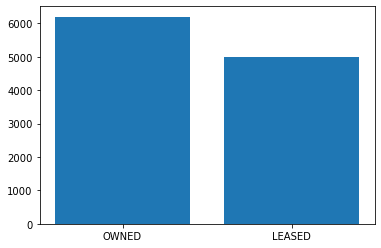

In [12]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [16]:
owned_leased = pd.pivot_table(parking,index =  'Owned/Leased', values = 'Total Parking Spaces' ,aggfunc = 'sum')
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,158210


<AxesSubplot:xlabel='Owned/Leased'>

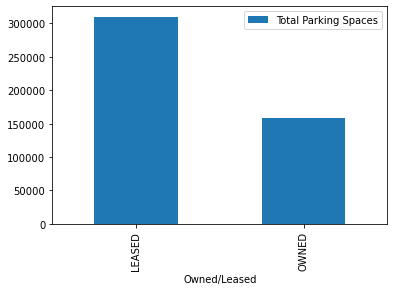

In [17]:
owned_leased.plot(kind = 'bar')

# 2 In which bldg state parking situation is in excess

In [18]:
excess_parking = pd.pivot_table(parking, index = 'Bldg State', columns = 'Bldg Status', values='Total Parking Spaces')
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [19]:
excess_parking = excess_parking[excess_parking.EXCESS > 0]
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

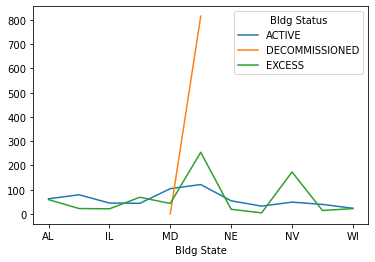

In [20]:
excess_parking.plot()

<AxesSubplot:xlabel='Bldg State'>

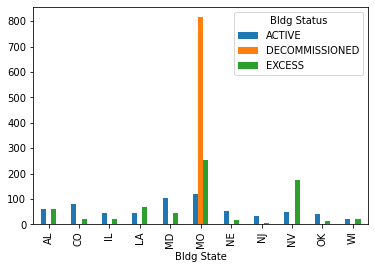

In [21]:
excess_parking.plot(kind = 'bar')

<BarContainer object of 11 artists>

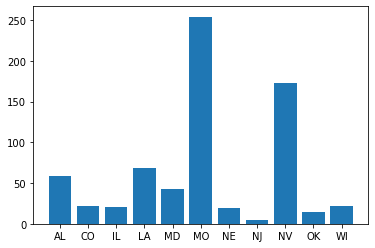

In [22]:
plt.bar(excess_parking.index,excess_parking.EXCESS)

In [23]:
excess_parking_sorted = excess_parking.EXCESS.sort_values

In [24]:
excess_parking_sorted = excess_parking.EXCESS.sort_values()

In [25]:
excess_parking_sorted

Bldg State
NJ      4.300000
OK     14.000000
NE     19.000000
IL     21.000000
WI     22.000000
CO     22.200000
MD     43.166667
AL     59.000000
LA     68.666667
NV    173.000000
MO    254.272727
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

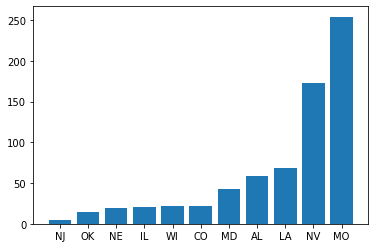

In [26]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

# 3. Bldg cities that have been decommisioned along with total parking 

In [27]:
dec_bldg = pd.pivot_table(parking,index = 'Bldg City', columns = 'Bldg Status' , values = 'Total Parking Spaces')
dec_bldg

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
ABERDEEN,35.909091,NaN,NaN
ABILENE,13.333333,NaN,NaN
ABINGDON,6.333333,NaN,NaN
ACCOMAC,25.000000,NaN,NaN
ADA,20.000000,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.000000,NaN,NaN
YUMA,21.357143,NaN,NaN
ZANESVILLE,75.000000,NaN,NaN


In [28]:
dec_bldg = dec_bldg[dec_bldg.DECOMMISSIONED > 0]

In [29]:
dec_bldg

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
OVERLAND,21.666667,2089.0,NaN
SAINT LOUIS,135.977273,178.5,NaN


In [30]:
decom_parking_city = parking[parking['Bldg City'] == 'DECOMMISSIONED']

In [31]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased


In [32]:
decom_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED']
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


# In which type of parking space is in excess

In [33]:
excess_parking_property = pd.pivot_table(parking[parking['Bldg Status'] == 'EXCESS'],index= 'Property Type', values = 'Total Parking Spaces')
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


# 5. Where is more active parking- Owned/Leased


In [34]:
active_parking = pd.pivot_table(parking[parking['Bldg Status'] == 'ACTIVE'],index = 'Owned/Leased' , values = 'Total Parking Spaces')
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [35]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [37]:
active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [38]:
active_parking['%Contri'] = active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

In [39]:
active_parking

,Total Parking Spaces,%Contri
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 5.Stats with more leased parking


In [43]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased'] == 'LEASED'], index = 'Bldg State' , values = 'Total Parking Spaces')
state_leased_parking

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
CT,26.134615
DC,42.562914
DE,15.592593
FL,49.102828


In [44]:
state_leased_parking.sort_values('Total Parking Spaces', ascending = False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


In [45]:
state_leased_parking.head()

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
